In [49]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D

#### Read the dataset

In [50]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [51]:
x_train.shape

(60000, 28, 28)

In [52]:
x_test.shape

(10000, 28, 28)

#### Explore the data

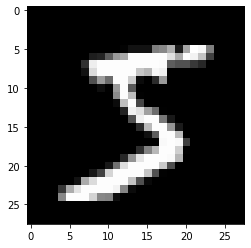

In [53]:
plt.imshow(x_train[0], cmap = 'gray')

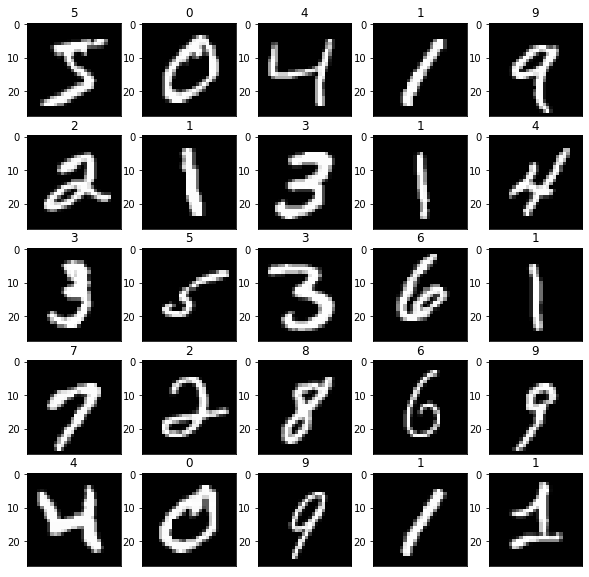

In [54]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.title(y_train[i])
    plt.imshow(x_train[i], cmap = 'gray')

#### Scale the data

In [55]:
x_train = x_train / 255
x_test = x_test / 255

In [56]:
x_train.shape

(60000, 28, 28)

In [57]:
y_train.shape

(60000,)

#### Build the model

In [64]:
model = Sequential()

model.add(Conv2D(filters=32, input_shape=(28,28,1), activation='relu',
         kernel_size=(3,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=16, activation='relu', kernel_size=(3,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [65]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',  metrics=['accuracy'])

In [66]:
model.fit(x_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
6000/6000 [==============================] - 49s 7ms/step - loss: 0.1152 - accuracy: 0.9638
Epoch 2/10
6000/6000 [==============================] - 43s 7ms/step - loss: 0.0438 - accuracy: 0.9862
Epoch 3/10
6000/6000 [==============================] - 43s 7ms/step - loss: 0.0314 - accuracy: 0.9903
Epoch 4/10
6000/6000 [==============================] - 43s 7ms/step - loss: 0.0239 - accuracy: 0.9923
Epoch 5/10
6000/6000 [==============================] - 43s 7ms/step - loss: 0.0183 - accuracy: 0.9941
Epoch 6/10
6000/6000 [==============================] - 44s 7ms/step - loss: 0.0145 - accuracy: 0.9953
Epoch 7/10
6000/6000 [==============================] - 43s 7ms/step - loss: 0.0125 - accuracy: 0.9959
Epoch 8/10
6000/6000 [==============================] - 43s 7ms/step - loss: 0.0103 - accuracy: 0.9964
Epoch 9/10
6000/6000 [==============================] - 43s 7ms/step - loss: 0.0103 - accuracy: 0.9965
Epoch 10/10
6000/6000 [==============================] - 43s 7ms/step - l

#### Evaluate on test data

In [67]:
model.evaluate(x_test, y_test, batch_size=1)

10000/10000 [==============================] - 20s 2ms/step - loss: 0.0388 - accuracy: 0.9911


[0.038757096976041794, 0.991100013256073]

In [88]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

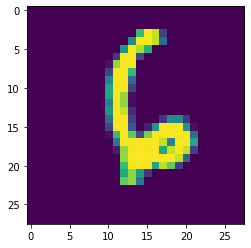

In [89]:
new = x_test[885]
plt.imshow(new);

In [90]:
new.shape

(28, 28)

In [91]:
new = new / 255
new = new.reshape(1,28,28)
np.argmax(model.predict(new))

1/1 [==============================] - 0s 23ms/step


6